In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [12]:
def load_dataset():
    
        
    fIm = open('/Users/louis/Documents/Virtual_car_data/images3.p', 'r')
    fIn = open('/Users/louis/Documents/Virtual_car_data/inputs3.p', 'r')
    X_train = pickle.load(fIm)/255.
    y_train = pickle.load(fIn)
    
    H = X_train.shape[1]
    W = X_train.shape[2]
    ch = X_train.shape[3]
    
    X_train = X_train.reshape(-1,ch,H,W)
    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.uint8)
    
    return X_train, y_train, H, W, ch

def deprocess(x):
    
    x = x.reshape(H,W)
    #x = x*255
    #x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
X_train, y_train, H, W, ch = load_dataset()

In [4]:
y_train2 = np.zeros(X_train.shape[0])
n = -1
for i in y_train:
    n += 1
    if i[2]==1:
        y_train2[n] = 0
    if i[3]==1:
        y_train2[n] = 1
    if i[2]==0 and i[3] == 0:
        y_train2[n] = 2
y_train2 = y_train2.astype('uint8')

In [5]:
print 'X type and shape:', X_train.dtype, X_train.shape
print 'X.min():', X_train.min()
print 'X.max():', X_train.max()
print 'y type and shape:', y_train2.dtype, y_train2.shape
print 'y.min():', y_train2.min()
print 'y.max():', y_train2.max()

X type and shape: float32 (3175, 1, 22, 75)
X.min(): 0.0
X.max(): 1.0
y type and shape: uint8 (3175,)
y.min(): 0
y.max(): 2


2

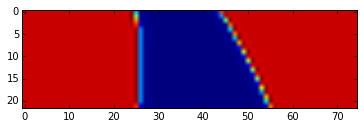

In [13]:
plt.imshow(deprocess(X_train[300]))
y_train2[300]

In [28]:
net1 = NeuralNet(
    #layers=[('input', layers.InputLayer),
    #        ('conv2d1', layers.Conv2DLayer),
    #        ('dense', layers.DenseLayer),
    #        ('output', layers.DenseLayer),
    #        ],
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            #('maxpool1', layers.MaxPool2DLayer),
            #('conv2d2', layers.Conv2DLayer),
            #('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, ch, H, W),
    # layer conv2d1
    conv2d1_num_filters=64,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    #maxpool1_pool_size=(2, 2),    
    ## layer conv2d2
    #conv2d2_num_filters=32,
    #conv2d2_filter_size=(5, 5),
    #conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    ## layer maxpool2
    #maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=32,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=3,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=25,
    verbose=1,
    )

In [29]:
nn = net1.fit(X_train, y_train2)

# Neural Network with 2619139 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x22x75
  1  conv2d1   64x18x71
  2  dropout1  64x18x71
  3  dense     32
  4  dropout2  32
  5  output    3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.97887       0.71181      1.37518      0.71174  14.59s
      2       0.75379       0.52549      1.43444      0.76134  15.35s
      3       0.70048       0.54998      1.27364      0.75025  14.77s
      4       0.68826       0.53132      1.29538      0.76122  14.66s
      5       0.66695       0.53751      1.24080      0.75181  14.29s
      6       0.64158       0.54496      1.17728      0.76122  14.46s
      7       0.63076       0.51820      1.21721      0.76286  14.54s
      8       0.61221       0.51753      1.18293      0.76294  14.62s
      9       0.62147       0.51968      1.19586      0.7565

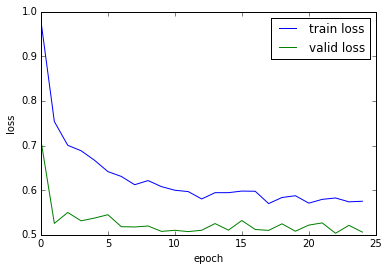

In [30]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net1)

In [67]:
net1.load_params_from('virtual_car_trained.np')

Loaded parameters to layer 'conv2d1' (shape 32x3x5x5).
Loaded parameters to layer 'conv2d1' (shape 32).
Loaded parameters to layer 'conv2d2' (shape 32x32x5x5).
Loaded parameters to layer 'conv2d2' (shape 32).
Loaded parameters to layer 'dense' (shape 960x32).
Loaded parameters to layer 'dense' (shape 32).
Loaded parameters to layer 'output' (shape 32x3).
Loaded parameters to layer 'output' (shape 3).


In [66]:
net1.save_params_to('virtual_car_trained.np')

[0]


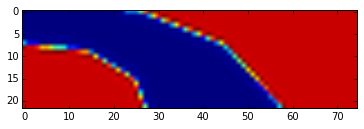

In [31]:
preds = net1.predict(X_train[210:211])
print preds
plt.imshow(deprocess(X_train[210]))

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


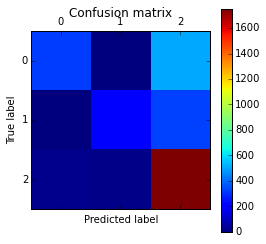

In [25]:
preds = net1.predict(X_train)
cm = confusion_matrix(y_train2, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
y_train2

array([2, 2, 2, ..., 2, 2, 2], dtype=uint8)

In [22]:
y_train2[502:900]

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2,